In [1]:
from studioGAN.CVAE_BigGAN import Encoder_cifar10,Generator_cifar10,Discriminator_cifar10,VAE
import torch
# GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# 初始化变分自编码器，分类器与判别器
Encoder=Encoder_cifar10(device=device)
Gen=Generator_cifar10(device=device)
Dis=Discriminator_cifar10(device=device)
vae = VAE().to(device)
Encoder.load_state_dict(torch.load('E:/Project/ModelAndDataset/model/CVAE-GAN-Cifar10-Encoder.pth'))
Gen.load_state_dict(torch.load('E:/Project/ModelAndDataset/model/CVAE-GAN-Cifar10-Decoder.pth'))
Dis.load_state_dict(torch.load('E:/Project/ModelAndDataset/model/CVAE-GAN-Cifar10-Discriminator.pth'))
vae.load_state_dict(torch.load('E:/Project/ModelAndDataset/model/CVAE-GAN-Cifar10-Vae.pth'))


<All keys matched successfully>

In [2]:
from torch.utils.data import DataLoader
from data_utils.load_dataset import *
import  matplotlib.pyplot as plt
import numpy as np
train_dataset = LoadDataset("cifar10", "E:/Project/ModelAndDataset/data", train=True, download=True, resize_size=32,
								random_flip=True)

# data loader 数据载入
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, pin_memory=True, drop_last=True)

train_iter=iter(train_dataloader)

Files already downloaded and verified


In [3]:
real_images, real_labels = next(train_iter)

In [4]:
real_images


tensor([[[[ 0.9765,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  0.9922,  1.0000],
          ...,
          [ 1.0000,  0.9922,  0.9843,  ...,  0.2471,  0.9843,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.5686,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  0.9922,  ...,  0.8980,  0.9765,  1.0000]],

         [[ 0.9765,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  0.9922,  1.0000],
          ...,
          [ 1.0000,  0.9922,  0.9922,  ...,  0.2471,  0.9843,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.5686,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  0.9922,  ...,  0.8980,  0.9765,  1.0000]],

         [[ 0.9765,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000],
          [ 1.0000,  1.0000,  

In [5]:
real_labels

tensor([9, 1, 3, 5, 7, 3, 0, 7, 1, 8, 1, 8, 0, 0, 2, 7, 8, 0, 9, 2, 6, 2, 9, 5,
        7, 9, 0, 7, 0, 4, 2, 5, 7, 6, 0, 1, 4, 4, 5, 3, 0, 9, 0, 8, 8, 7, 7, 0,
        2, 7, 1, 0, 0, 6, 3, 0, 8, 0, 1, 8, 3, 5, 0, 0, 4, 0, 8, 5, 1, 8, 4, 8,
        9, 1, 2, 1, 4, 7, 2, 5, 2, 9, 7, 7, 7, 4, 0, 1, 9, 1, 2, 7, 3, 2, 9, 9,
        2, 9, 9, 3, 4, 1, 0, 8, 6, 1, 8, 5, 6, 8, 3, 9, 8, 2, 7, 8, 6, 3, 1, 6,
        0, 2, 7, 8, 9, 1, 2, 6])

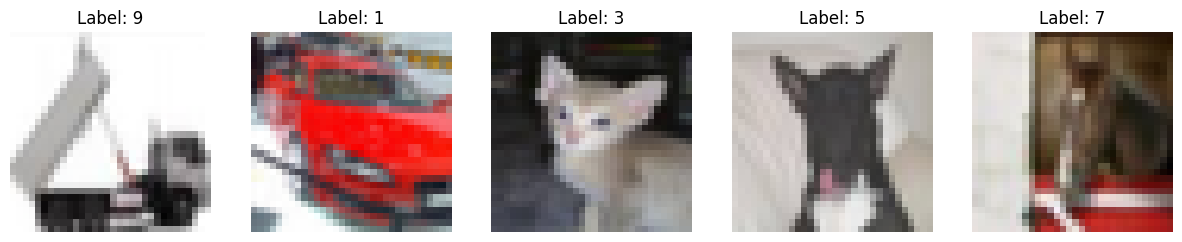

In [6]:
num_images_to_visualize = 5
fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(num_images_to_visualize*3, 3))
real_images = real_images / 2 + 0.5  # Reverse normalization to bring the image range back to [0, 1]
for i in range(num_images_to_visualize):
    image=real_images[i]
    label=real_labels[i] 
    img = np.transpose(image, (1, 2, 0))  # Reorder channel dimensions to (H, W, C)
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')